In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from numpy.linalg import inv
plt.style.use('seaborn-whitegrid')

np.random.seed(0)

In [2]:
#Base bandit class
class Agent():
    def __init__(self, n_feature, action_space):
        self.action_space = action_space
    
    def pick_actions(self,contexts):
        pass
    
    def update_model(self,x,a,r):
        pass

#random bandit
class RandomBandit(Agent):
    def __init__(self, n_feature, action_space):
        Agent.__init__(self,n_feature, action_space)
        
    def pick_actions(self,contexts):
        actions = {}
        for action in self.action_space:
            actions[action] = np.random.choice(self.action_space[action])
        return actions
    
class Thompson_Sampling_Bayesian_Bandit(Agent):
    def __init__(self, n_feature, action_space):
        Agent.__init__(self,n_feature, action_space)
        
    def pick_actions(self,contexts):
        actions = {}
        for action in self.action_space:
            actions[action] = np.random.choice(self.action_space[action])
        return actions
    
    def update_model(self,contexts,actions,r):
        pass

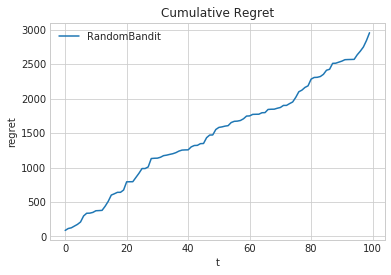

In [4]:
#class that runs simulation and plot regrets
class Experiment():
    def __init__(self, iterations, agent, context_variables, action_space,):
        self.agent = agent
        self.iterations = iterations
        self.context_variables = context_variables
        self.action_space = action_space
        
    def get_true_reward(self, contexts,actions):
        return 30. + (-5.) * contexts['C0'] + 10.0 * contexts['C1'] \
                   + 12. * contexts['C0'] * actions['A0'] + (-8.) * contexts['C1'] * actions['A0'] \
                   + (-10.) * contexts['C0'] * actions['A1'] + 15. * contexts['C1'] * actions['A1'] \
                   + np.random.rand() * 5.
    
    def get_rand_context(self):
        contexts = {}
        for var in self.context_variables:
            contexts[var] = np.random.randint(0,5)
        return contexts
    
    def get_optimal_actions(self,contexts):
        all_possible_a = [{}]
        for cur in self.action_space:
            cur_options = self.action_space[cur]
            new_possible = []
            for a in all_possible_a:
                for cur_a in cur_options:
                    new_a = a.copy()
                    new_a[cur] = cur_a
                    new_possible.append(new_a)
            all_possible_a = new_possible
        return all_possible_a[np.argmax([self.get_true_reward(contexts,a) for a in all_possible_a])]
                  
    def run(self):
        regret = 0.
        regret_list = []
        for i in range(self.iterations):
            contexts = self.get_rand_context()
            actions = self.agent.pick_actions(contexts)
            r = self.get_true_reward(contexts,actions)
            self.agent.update_model(contexts,actions,r)
            regret += abs(r - self.get_true_reward(contexts,self.get_optimal_actions(contexts)))
            regret_list.append(regret)
        
        #plot regrets
        fig,ax = plt.subplots()
        ax.set_title('Cumulative Regret')
        ax.set_xlabel('t')
        ax.set_ylabel('regret')
        #ax.set_ylim(0.,200.)
        ax.plot(regret_list, label=str(type(self.agent).__name__))
        ax.legend()
            
action_space = {'A0':[0,1], 'A1':[0,1,2]}
agent = RandomBandit(100,action_space)
exp = Experiment(100, RandomBandit(0,action_space),['C0','C1'],action_space)
exp.run()